In [52]:
#dependencies
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import time
import requests
from config import weather_api_key
from datetime import datetime
from citipy import citipy
from scipy.stats import linregress


In [ ]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000,size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lats_lngs = zip(lats, lngs)

In [ ]:
# add latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [ ]:
#create a list for holding the cities
cities = []
#identify nearest city for each lat, lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #if the city is unique then it will be added to cities list
    if city not in cities:
        cities.append(city)
len(cities)

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
#create an empty list to hold weather data
city_data = []
#print beginning of data retrieval
print("Beginning of Data Retrieval")
print("---------------------------")
#create counters
record_count = 1
set_count = 1

#loop through list of cities and build city url
for i, city in enumerate(cities):
    #group cities in sets of 50 for tracking 
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create city url
    city_url = url + "&q=" + city.replace(" ","+")
    #log url, record numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
    #run api request for each city
    try:
        #parse json and retrieve data
        city_weather = requests.get(city_url).json()
        #parse needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds= city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append city info into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #if an error is encountered skip the city
    except:
        print("City not found. Skipping...")
        pass
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


In [ ]:
#create dataframe from list of dictionaries
city_data_df = pd.DataFrame(city_data)


In [ ]:
#re-order column titles 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

In [31]:
#create output file (csv)
output_data_file = "weather_data/cities.csv"
#export city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
#extract relevant fields from dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

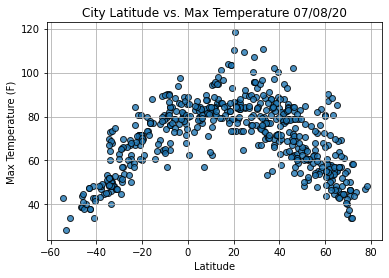

In [39]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig1.png")
#show plt
plt.show()

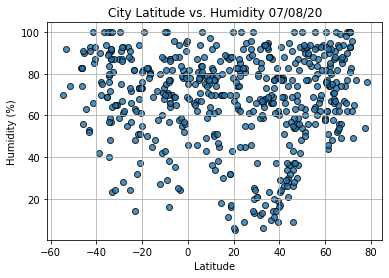

In [40]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig2.png")
#show plt
plt.show()

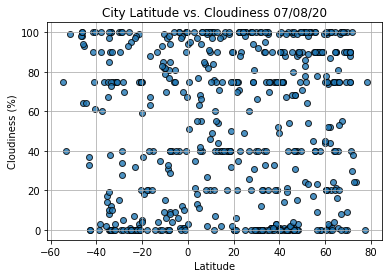

In [41]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig3.png")
#show plt
plt.show()

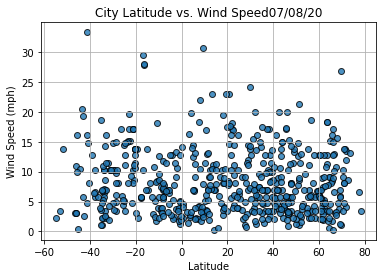

In [42]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
#other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save figure
plt.savefig("weather_data/Fig4.png")
#show plt
plt.show()

In [44]:
#create a function for plotting linear regression
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [47]:
#create northern-hemisphere and southern-hemisphere dataframes 
#row = df.loc[row_index]
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<0)]

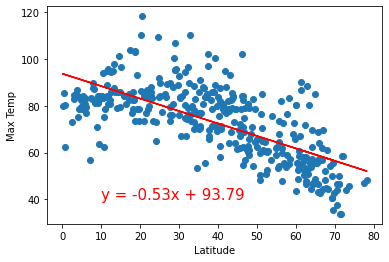

In [56]:
#linear regression on northern hemisphere for max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

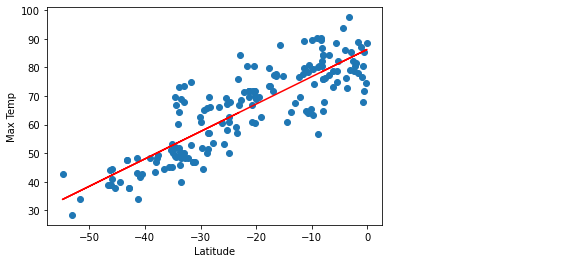

In [67]:
#linear regression on southern hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call function
plot_linear_regression(x_values, y_values, "Linear Regression on Souther Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

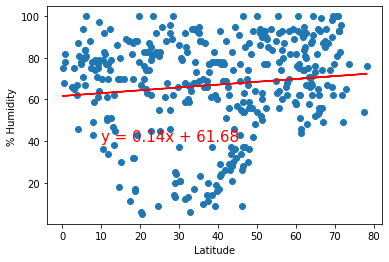

In [66]:
#linear regression on northern hemisphere for % humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidiy", '% Humidity ',(10,40))

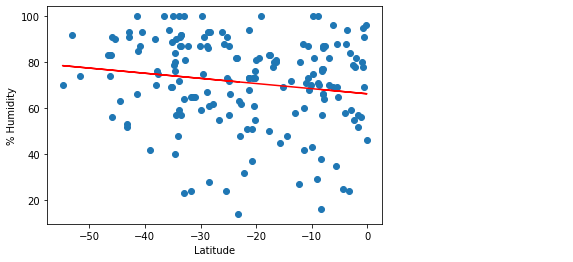

In [69]:
#linear regression on southern hemisphere for max temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(10,40))

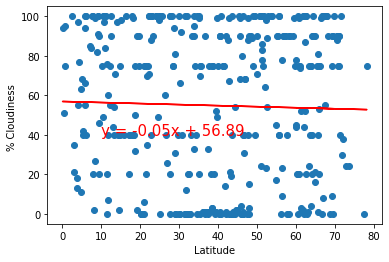

In [70]:
#linear regression on northern hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness ',(10,40))

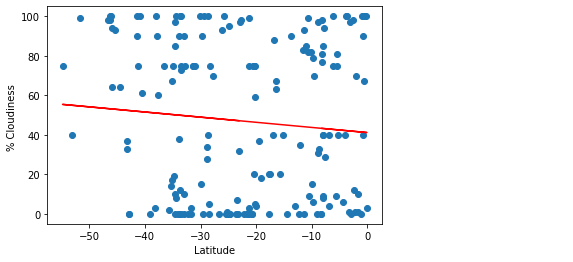

In [71]:
#linear regression on southern hemisphere for % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,"Linear Regression on the Northern Hemisphere \n for % Cloudiness", '% Cloudiness ',(10,40))

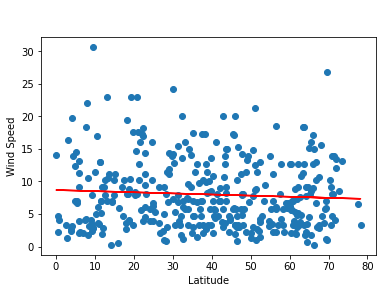

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

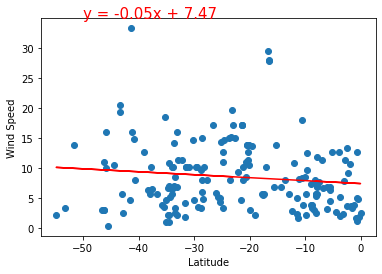

In [74]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))